In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species
0,0,0.997944,0.832392,0.765386,0.704275,0.655724,0.331064,0.927524,0.307601,0.492226,...,2507.041444,2730.515996,2609.940118,2703.391485,2676.400501,2818.375970,2706.119792,2740.820762,2684.624946,flammea
1,1,0.996255,0.839120,0.760417,0.705142,0.662990,0.329859,0.924461,0.300951,0.493679,...,2490.339399,2730.212864,2609.668564,2703.721292,2676.695013,2818.554958,2705.497472,2741.509333,2683.727859,flammea
2,2,0.970810,0.823540,0.759508,0.709058,0.659750,0.336233,0.933035,0.301501,0.491263,...,2497.486714,2729.438087,2609.010529,2704.515718,2677.465965,2818.971388,2703.952638,2743.213960,2681.482884,flammea
3,3,1.000000,0.855558,0.752038,0.710977,0.664579,0.334564,0.928026,0.292012,0.493557,...,2503.217602,2728.961249,2608.631818,2704.971676,2677.953716,2819.200288,2703.033515,2744.224849,2680.133570,flammea
4,4,1.000000,0.884305,0.741885,0.714775,0.672465,0.329072,0.912804,0.279094,0.501200,...,2523.364512,2728.800252,2608.508516,2705.120155,2678.118949,2819.273155,2702.728487,2744.559785,2679.683390,flammea


In [3]:
df['species'].unique()

array(['flammea', 'palustris', 'schoenobaenus', 'scirpaceus', 'caudatus',
       'arvensis', 'pratensis', 'trivialis', 'apus', 'canadensis',
       'alpina', 'europaeus', 'carduelis', 'familiaris', 'chloris',
       'ridibundus', 'monedula', 'livia', 'oenas', 'palumbus', 'corax',
       'corone', 'frugilegus', 'canorus', 'caeruleus', 'urbicum', 'major',
       'martius', 'calandra', 'citrinella', 'schoeniclus', 'rubecula',
       'coelebs', 'atra', 'gallinago', 'chloropus', 'glandarius',
       'stellata', 'ostralegus', 'rustica', 'torquilla', 'lagopus',
       'argentatus', 'cannabina', 'fluviatilis', 'curvirostra',
       'megarhynchos', 'apiaster', 'aguimp', 'flava', 'striata',
       'oriolus', 'domesticus', 'montanus', 'perdix', 'ater', 'apivorus',
       'colchicus', 'phoenicurus', 'collybita', 'sibilatrix', 'trochilus',
       'pica', 'viridis', 'apricaria', 'squatarola', 'modularis',
       'pyrrhula', 'regulus', 'europaea', 'decaocto', 'turtur', 'aluco',
       'vulgaris', 'at

In [4]:
features=['chromogram_0_0',
 'chromogram_0_1',
 'chromogram_0_10',
 'chromogram_0_11',
 'chromogram_0_12',
 'chromogram_0_2',
 'chromogram_0_3',
 'chromogram_0_4',
 'chromogram_0_5',
 ]
target = ['species']


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5
0,0.997944,0.832390,0.765385,0.704261,0.655699,0.331055,0.927523,0.307587,0.492221
1,0.996255,0.839117,0.760415,0.705128,0.662966,0.329849,0.924460,0.300937,0.493674
2,0.970810,0.823537,0.759506,0.709044,0.659726,0.336223,0.933034,0.301488,0.491259
3,1.000000,0.855556,0.752036,0.710964,0.664555,0.334554,0.928025,0.291999,0.493552
4,1.000000,0.884303,0.741883,0.714762,0.672441,0.329063,0.912803,0.279080,0.501195


In [6]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5
0,1.119846,-0.071376,-0.390061,0.059592,0.213100,0.348527,-0.307918,-0.007195,-0.236017
1,1.119120,-0.070528,-0.396456,0.066214,0.206424,0.344705,-0.309736,-0.007032,-0.241934
2,1.110916,-0.057006,-0.384314,0.045686,0.198403,0.334506,-0.313551,-0.002498,-0.238112
3,1.125449,-0.080414,-0.407255,0.070901,0.200031,0.339075,-0.315634,0.001469,-0.248989
4,1.125932,-0.085157,-0.423095,0.095951,0.194315,0.326132,-0.313314,0.009085,-0.267115


In [7]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.65125803, 0.15571447, 0.06501223, 0.04539525, 0.0302964 ,
       0.02698062, 0.01161583, 0.0079841 , 0.00574305])

In [8]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,target
0,1.119846,-0.071376,-0.390061,0.059592,0.213100,0.348527,-0.307918,-0.007195,-0.236017,flammea
1,1.119120,-0.070528,-0.396456,0.066214,0.206424,0.344705,-0.309736,-0.007032,-0.241934,flammea
2,1.110916,-0.057006,-0.384314,0.045686,0.198403,0.334506,-0.313551,-0.002498,-0.238112,flammea
3,1.125449,-0.080414,-0.407255,0.070901,0.200031,0.339075,-0.315634,0.001469,-0.248989,flammea
4,1.125932,-0.085157,-0.423095,0.095951,0.194315,0.326132,-0.313314,0.009085,-0.267115,flammea


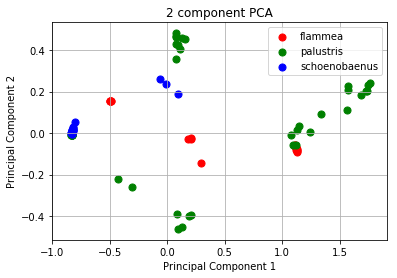

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['flammea', 'palustris', 'schoenobaenus']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

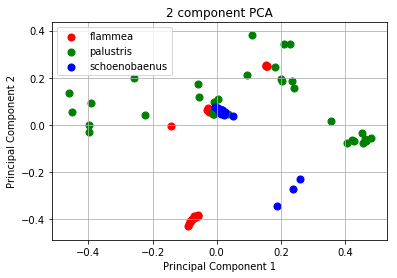

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['flammea', 'palustris', 'schoenobaenus']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC2']
    , df_pca.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()